w[0]: 0.393906  b: -0.031804


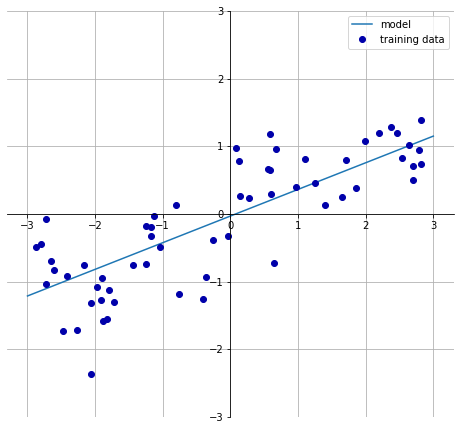

lr.coef_ : (веса) [0.39390555]
lr.intercept_ (сдвиги): -0.031804343026759746
Правильность на обучающем наборе wave: 0.67
Правильность на тестовом наборе wave: 0.66
Правильность на обучающем наборе boston extended: 0.95
Правильность на тестовом наборе boston extended: 0.61
Ridge - Правильность на обучающем наборе boston extended: 0.89
Ridge - Правильность на тестовом наборе boston extended: 0.75
Ridge - Правильность на обучающем наборе с alfa=10: 0.79
Ridge - Правильность на тестовом наборе с alfa=10: 0.64
Ridge - Правильность на обучающем наборе c alfa=0.1: 0.93
Ridge - Правильность на тестовом наборе c alfa=0.1: 0.77


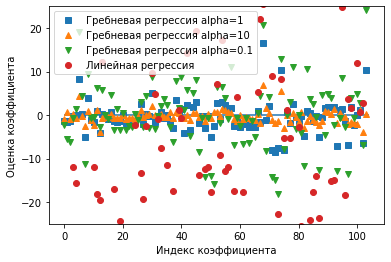

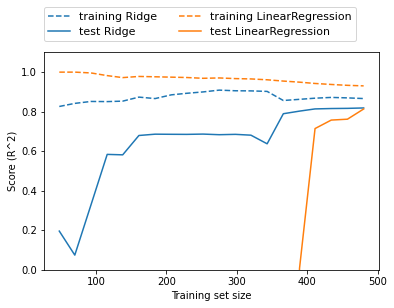

Lasso - Правильность на обучающем наборе: 0.29
Lasso - Правильность на контрольном наборе: 0.21
Lasso - Количество использованных признаков: 4
Lasso - Правильность на обучающем наборе (alfa = 0.01): 0.90
Lasso - Правильность на тестовом наборе (alfa = 0.01): 0.77
Lasso - Количество использованных признаков (alfa = 0.01): 33
Lasso - Правильность на обучающем наборе (alfa = 0.0001): 0.95
Lasso - Правильность на тестовом наборе (alfa = 0.0001): 0.64
Lasso - Количество использованных признаков (alfa = 0.0001): 96


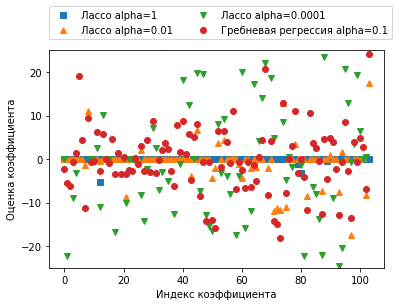

In [8]:
import sklearn
import mglearn
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

#строим модель линейной регрессии на наборе wave
#w - вес, b - смещение
mglearn.plots.plot_linear_regression_wave()
plt.show()

#код, который нас самом деле строит модельку выше
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#построение модельки
lr = LinearRegression().fit(X_train, y_train)
#вес один - на один признак - определяет влияние признака на положение линии
print("lr.coef_ : (веса) {}".format(lr.coef_))
print("lr.intercept_ (сдвиги): {}".format(lr.intercept_))

#низкое качество модели - маленький набор - недообучение
print("Правильность на обучающем наборе wave: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе wave: {:.2f}".format(lr.score(X_test, y_test)))

#пробуем на наборе побольше
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
#переобучились - слишком сложная модель - нужно контролировать сложность
print("Правильность на обучающем наборе boston extended: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе boston extended: {:.2f}".format(lr.score(X_test, y_test)))

#более строгая моделька контролирует расчет весов для признаков - вероятность переобучения ниже
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Ridge - Правильность на обучающем наборе boston extended: {:.2f}".format(ridge.score(X_train, y_train)))
print("Ridge - Правильность на тестовом наборе boston extended: {:.2f}".format(ridge.score(X_test, y_test)))
#насколько сильно мы сжимаем веса признаков
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Ridge - Правильность на обучающем наборе с alfa=10: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Ridge - Правильность на тестовом наборе с alfa=10: {:.2f}".format(ridge10.score(X_test, y_test)))
#меньше сжимаем - увеличиваем обобщающую способность
#но можем дойти до линейной регрессии
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Ridge - Правильность на обучающем наборе c alfa=0.1: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Ridge - Правильность на тестовом наборе c alfa=0.1: {:.2f}".format(ridge01.score(X_test, y_test)))
#смотрим как степень сжатия влияет на коэффициенты
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

#смотрим на кривые обучения
mglearn.plots.plot_ridge_n_samples()
plt.show()

#смотрим на недообучение при методе лассо
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Lasso - Правильность на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("Lasso - Правильность на контрольном наборе: {:.2f}".format(lasso.score(X_test, y_test)))
print("Lasso - Количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0)))
#увеличим веса
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Lasso - Правильность на обучающем наборе (alfa = 0.01): {:.2f}".format(lasso001.score(X_train, y_train)))
print("Lasso - Правильность на тестовом наборе (alfa = 0.01): {:.2f}".format(lasso001.score(X_test, y_test)))
print("Lasso - Количество использованных признаков (alfa = 0.01): {}".format(np.sum(lasso001.coef_ != 0)))

#еще увеличим
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Lasso - Правильность на обучающем наборе (alfa = 0.0001): {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Lasso - Правильность на тестовом наборе (alfa = 0.0001): {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Lasso - Количество использованных признаков (alfa = 0.0001): {}".format(np.sum(lasso00001.coef_ != 0)))
#показываем как алгоритм влияет на вычисление весов
plt.plot(lasso.coef_, 's', label="Лассо alpha=1")
plt.plot(lasso001.coef_, '^', label="Лассо alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Лассо alpha=0.0001")

#сравниваем лассо с гребневой регрессией
plt.plot(ridge01.coef_, 'o', label="Гребневая регрессия alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.show()

